<a href="https://www.kaggle.com/code/carloscll/data-visualization-from-sratch-seaborn?scriptVersionId=167329082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Hello**,

This analysis is motivated by the following fact: in 2015, the *Fandango* platform was accused of 'rigging' movie ratings with the aim of selling tickets for each film. According to the accusations of tampering, the site https://fivethirtyeight[1] even published an article at the time, using statistics to try to confirm whether there was indeed a relationship and dishonesty in the ratings.

The objective of the analysis is, therefore, to revisit the article and conduct another analysis to confirm the facts and validate the *fivethirtyeight* platform's hypothesis. We have two datasets: 'fandago_scrape.csv' with columns containing movie ratings and the number of votes received from the public, with the names of the films released in 2015, and also 'all_sites_scores.csv', which contains ratings for the same films from the Rotten, IMDB, and Metacritic platforms.

During the analysis, the strategy is to use information from the 'fandango_scrape' dataset to compare the 'STARS' column, i.e., the visual rating provided by the site[2], with the 'RATING' column, the actual numerical value for each rating. We will also explore the relationship between the public votes (VOTES) and these columns. We will compare ratings for the same movies across different platforms, try to identify a 'pattern' in the ratings, and determine if there is any deviation from our study subject (Fandango ratings). Additionally, we will compare the differences between the scores from critics and users on other sites (Rotten, Metacritic) and observe which movies are highly rated by both critics and the audience, noting the nuances between choices.

The goal is to ensure a good cinema experience for those who consider movie ratings, especially considering that Fandango is also a ticket-selling platform. This analysis aims to prevent consumer frustration due to broken **expectations**.

- [1] Full article: [https://fivethirtyeight.com/features/fandango-movies-ratings/](https://fivethirtyeight.com/features/fandango-movies-ratings/)
- [2] Image of the RATING system attached.

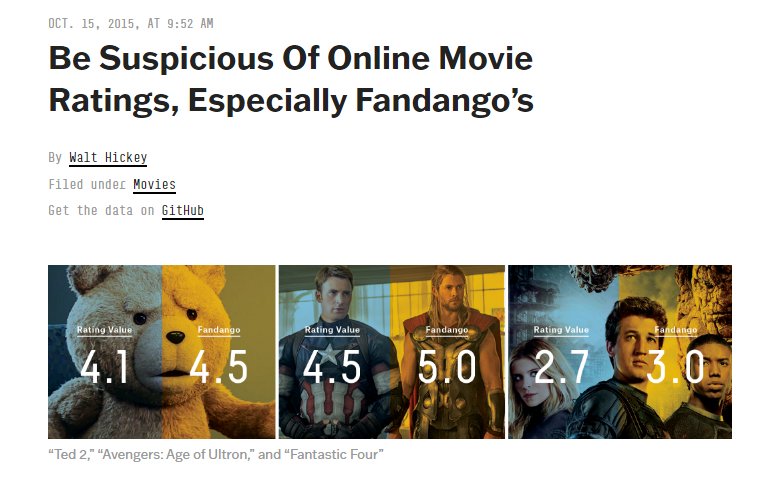

# Part I

## Analyse

In [1]:
# manipulate data
import pandas as pd
import numpy as np

# visualize data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# processing
from sklearn.preprocessing import RobustScaler, StandardScaler


%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale= .9)
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['figure.dpi'] = 150
plt.style.use('fivethirtyeight')

In [3]:
fandango = pd.read_csv('/kaggle/input/fandang/fandango_scrape.csv')
others = pd.read_csv('/kaggle/input/fandang/all_sites_scores.csv')

In [4]:
fandango.sample(50)

,FILM,STARS,RATING,VOTES
130,TCM presents Double Indemnity (2015),5.0,4.8,131
74,Ricki and the Flash (2015),4.0,3.7,1462
102,A La Mala (2015),5.0,4.6,536
117,What We Do in the Shadows (2015),4.5,4.3,259
361,The Good Dinosaur (2015),5.0,4.8,4
56,Hot Pursuit (2015),4.0,3.7,2618
47,"McFarland, USA (2015)",5.0,4.6,3364
255,Heaven Knows What (2015),4.0,3.5,17
139,Insider Access to Disney Pixarâ€™s Inside Out ...,5.0,4.7,110
451,Elephant Song (2015),0.0,0.0,0


**The dataset has the following characteristics**:
504 Rows and 4 Columns, namely FILM, STARS, RATING, VOTES, where FILM is a column with the movie's name, STARS is the visual representation made by the platform, RATING is the original vote, and VOTES is the quantity of people who voted. None of the columns have null values.

### Distribution
As we are trying to visualize if there is a discrepancy between STARS and RATING, a visual way to observe this would be through distribution plots for the categories.

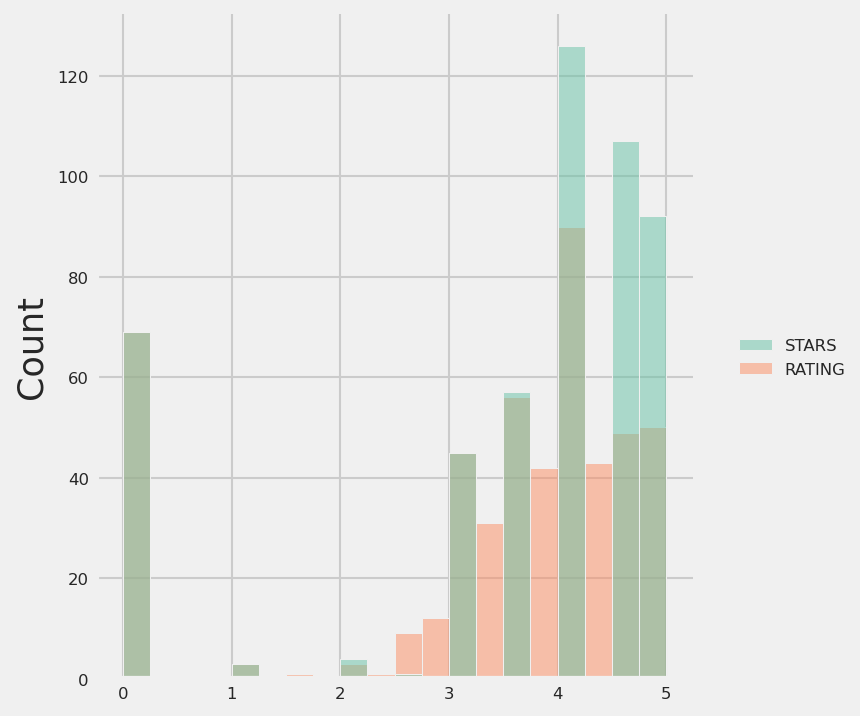

In [5]:
# STARS vs RATING
sns.set_palette('Set2')
sub_set = fandango[['STARS', 'RATING']]
sns.displot(sub_set);

It is observed that there is a difference between the ratings, especially between values of 4 to 5 points.

### Comparison
As mentioned in our planning, another strategy we can adopt is to confront these values. We'll attempt to observe the rate at which they deviate and check for any patterns.

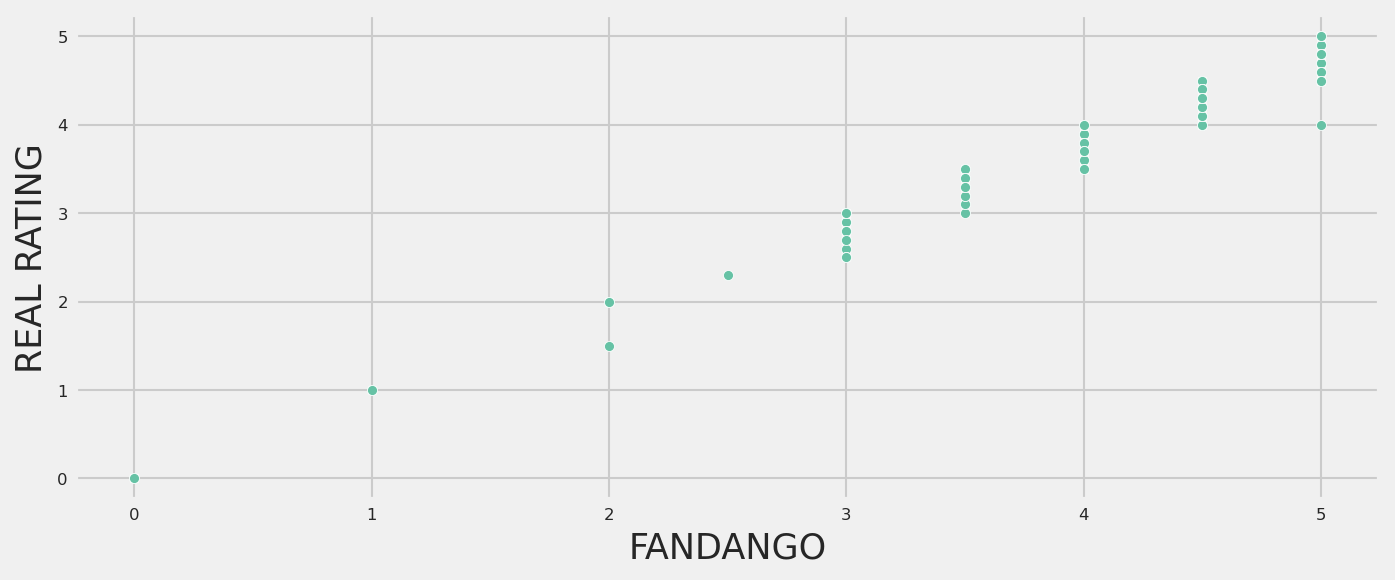

In [6]:
sns.set_palette('Set2')
sns.scatterplot(data=fandango, x='STARS', y='RATING');
plt.xlabel("FANDANGO")
plt.ylabel("REAL RATING");

## Clean and Transform
In this stage, we will perform transformations on the data, select only the range of suspicious ratings (greater than or equal to four), change the dataset index, and transform the data. Additionally, we can create a new feature where we will relate the actual rating (RATING) to the platform rating (STARS).

In [7]:
# filter and index and new features
fandango_transform = fandango.copy()
fandango_subset_by_4 = fandango_transform[fandango_transform['STARS'] > 4].set_index("FILM")
fandango_subset_by_4['DIFFERENCE'] = fandango_subset_by_4['STARS'] - fandango_subset_by_4['RATING']
fandango_subset_by_4['PERCENTAGE'] = np.round(fandango_subset_by_4['DIFFERENCE'] / fandango_subset_by_4['RATING'] * 100, 2)
fandango_subset_by_4.head(50)

,STARS,RATING,VOTES,DIFFERENCE,PERCENTAGE
FILM,,,,,
Jurassic World (2015),4.5,4.5,34390,0.0,0.00
American Sniper (2015),5.0,4.8,34085,0.2,4.17
Furious 7 (2015),5.0,4.8,33538,0.2,4.17
Inside Out (2015),4.5,4.5,15749,0.0,0.00
The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2,4.65
Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3,7.14
Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,11.11
Cinderella (2015),5.0,4.5,12640,0.5,11.11
Ant-Man (2015),5.0,4.5,12055,0.5,11.11


In [8]:
# scaling
sub_4 = fandango_subset_by_4.copy()

The "VOTES" column underwent a logarithmic transformation to allow for better comparison with the others. With this transformation, we have completed our adjustments and can now reassess the data.

## Exploratory Data Analysis
Earlier, we created new features (DIFFERENCE and PERCENTAGE) with the aim of better understanding the correlation between our features. Additionally, we adjusted the scale of the "VOTES" column to visualize the data more effectively.

### Basic Statistics

In [9]:
np.round(sub_4.describe(), 2)

,STARS,RATING,VOTES,DIFFERENCE,PERCENTAGE
count,199.00,199.00,199.00,199.00,199.00
mean,4.73,4.49,2053.30,0.24,5.57
std,0.25,0.31,5145.84,0.17,4.09
min,4.50,4.00,1.00,0.00,0.00
25%,4.50,4.20,8.00,0.10,2.27
50%,4.50,4.40,45.00,0.20,4.65
75%,5.00,4.75,880.00,0.40,8.70
max,5.00,5.00,34390.00,1.00,25.00


### Visualization

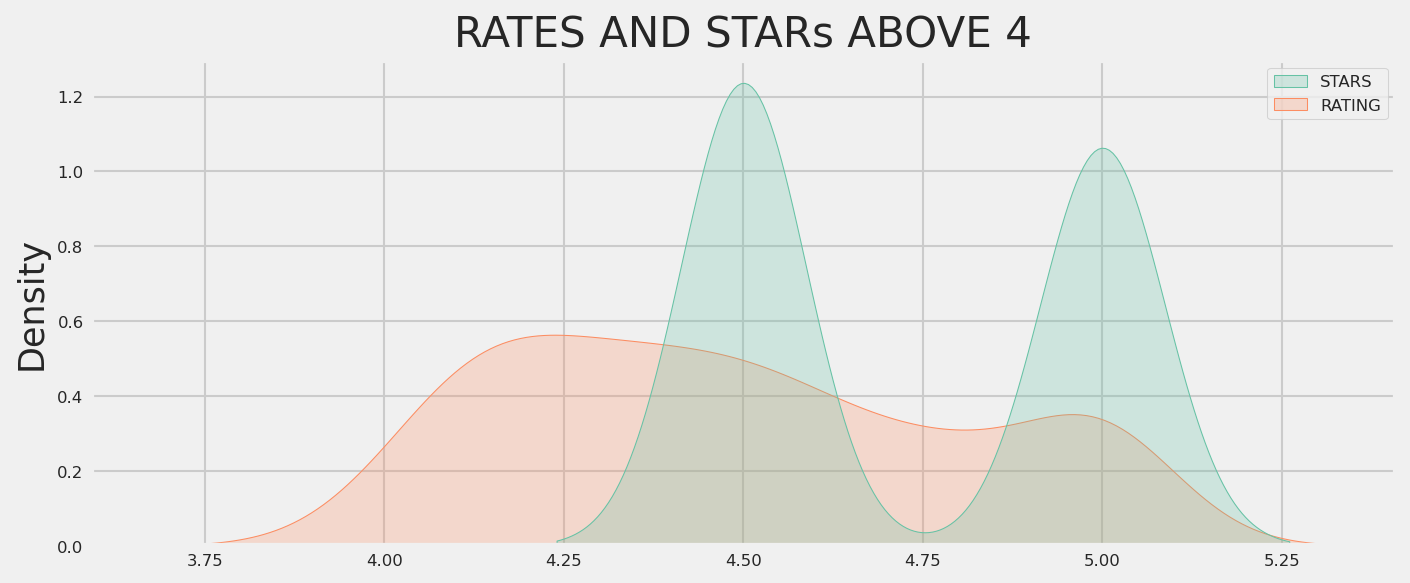

In [10]:
# STARS vs RATING
sns.set_palette('Set2')
sub_set_4 = sub_4[['STARS', 'RATING']]
sns.kdeplot(sub_set_4, fill=True);
plt.title("RATES AND STARs ABOVE 4");

In [11]:
print(f"Mean Absolute Difference RATTING AND STARS: {sub_4['DIFFERENCE'].apply(abs).mean():.2f}%")

Mean Absolute Difference RATTING AND STARS: 0.24%


It's noticeable that there is a greater concentration of ratings between 4.5 and 5.0, precisely because of the 'roundings.'

### Groupby

In [12]:
np.round(pd.DataFrame(sub_4.groupby("RATING")["STARS"].mean()).sort_values("STARS", ascending=False), 2)

,STARS
RATING,
4.6,5.00
4.7,5.00
4.8,5.00
4.9,5.00
5.0,5.00
4.5,4.81
4.0,4.57
4.1,4.50
4.2,4.50


With the **groupby** function, it's possible to deduce that they do not follow a .5 logic (rounding up or down). In some cases, the rating increases sharply from 4 to 4.5!

In [13]:
np.round(pd.DataFrame(sub_4.iloc[sub_4["PERCENTAGE"].argmax()]), 2)

,Turbo Kid (2015)
STARS,5.0
RATING,4.0
VOTES,2.0
DIFFERENCE,1.0
PERCENTAGE,25.0


**Turbo Kid (2015)** was the movie that received the highest percentage of ratings, with a staggering jump of 25%.

In [14]:
np.round(pd.DataFrame(sub_4.iloc[sub_4["VOTES"].argmax()]), 2)

,Jurassic World (2015)
STARS,4.5
RATING,4.5
VOTES,34390.0
DIFFERENCE,0.0
PERCENTAGE,0.0


The movie that received the most votes was **Jurassic World (2015)**.

In [15]:
np.round(pd.DataFrame(sub_4.iloc[sub_4["VOTES"].argmin()]), 2)

,A Hard Day (2015)
STARS,5.0
RATING,5.0
VOTES,1.0
DIFFERENCE,0.0
PERCENTAGE,0.0


The movie that received the fewest votes was **A Hard Day (2015)**.

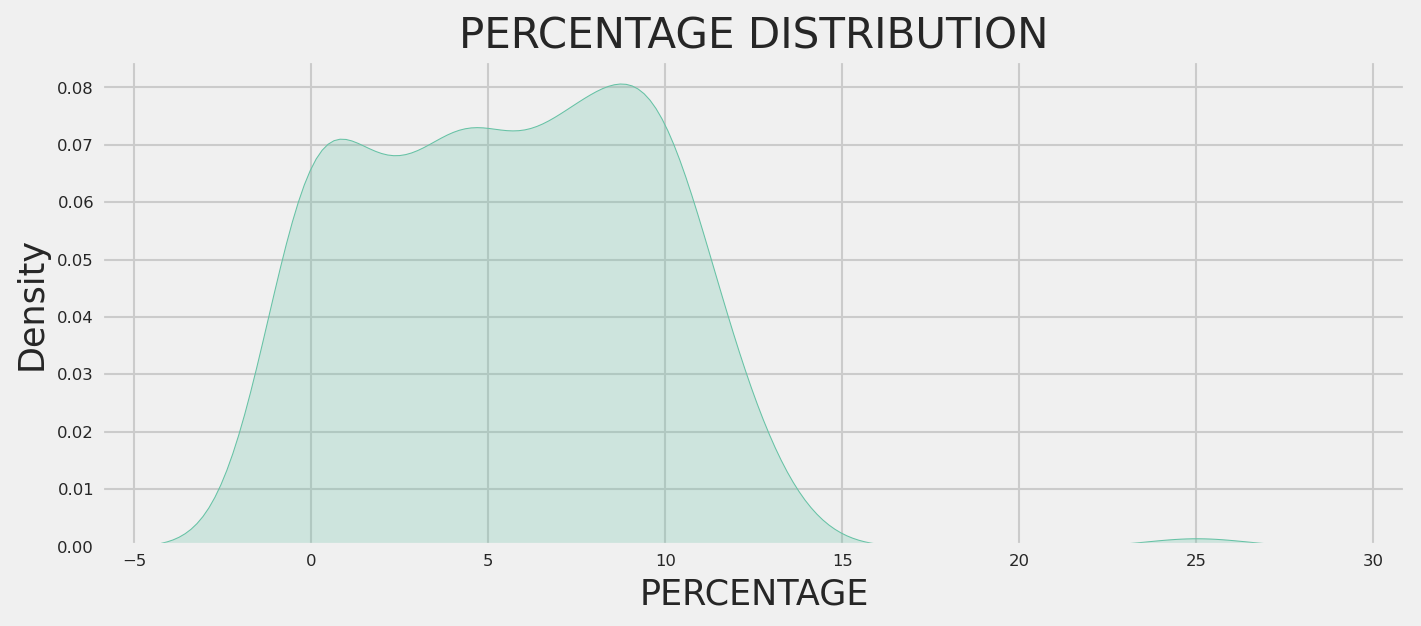

In [16]:
sns.kdeplot(data=sub_4, x="PERCENTAGE", fill=True)
plt.title("PERCENTAGE DISTRIBUTION");

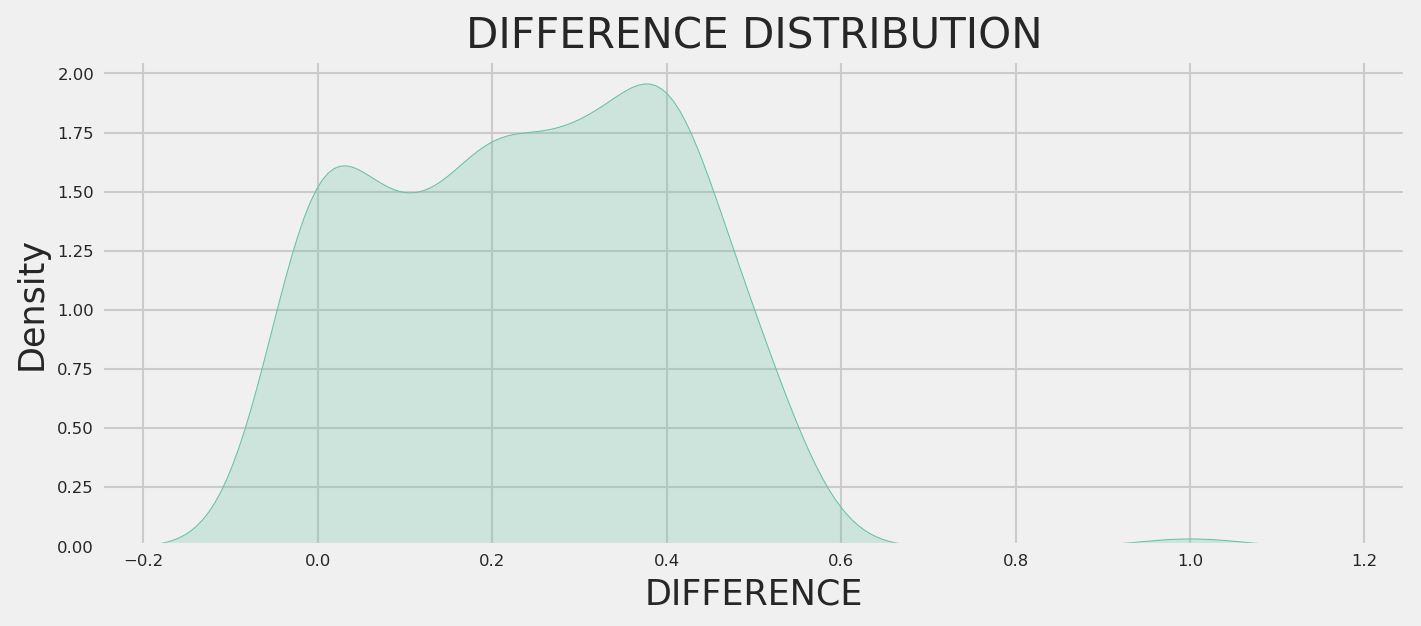

In [17]:
sns.kdeplot(data=sub_4, x="DIFFERENCE", fill=True)
plt.title("DIFFERENCE DISTRIBUTION");

### Top 10 most volted movies

In [18]:
np.round(sub_4.nlargest(10, "VOTES"), 2)

,STARS,RATING,VOTES,DIFFERENCE,PERCENTAGE
FILM,,,,,
Jurassic World (2015),4.5,4.5,34390,0.0,0.00
American Sniper (2015),5.0,4.8,34085,0.2,4.17
Furious 7 (2015),5.0,4.8,33538,0.2,4.17
Inside Out (2015),4.5,4.5,15749,0.0,0.00
The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2,4.65
Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3,7.14
Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,11.11
Cinderella (2015),5.0,4.5,12640,0.5,11.11
Ant-Man (2015),5.0,4.5,12055,0.5,11.11


# Part II
In the previous stage, we focused solely on the data from FANDANGO and its ratings. However, there are still more studies to be conducted. What would be the average rating of these same movies on other websites during the same period?

In [19]:
others = others.set_index("FILM")
others.sample(50)

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
FILM,,,,,,,
Far From The Madding Crowd (2015),84,77,71,7.5,7.2,35,12129
Fifty Shades of Grey (2015),25,42,46,3.2,4.2,778,179506
Amy (2015),97,91,85,8.8,8.0,60,5630
Wild Tales (2014),96,92,77,8.8,8.2,107,50285
Mr. Turner (2014),98,56,94,6.6,6.9,98,13296
The Water Diviner (2015),63,62,50,6.8,7.2,34,39373
The Boy Next Door (2015),10,35,30,5.5,4.6,75,19658
Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,211,15004
Still Alice (2015),88,85,72,7.8,7.5,153,57123


The 'others.csv' dataset has 146 rows and seven columns, with each column dedicated to recording the ratings from the **Rotten Tomatoes**, **IMDB**, and **Metacritic** platforms. Each platform also includes the number of voters, and 'FILME' is the index of our dataframe.

### RT (ROTTEN TOMATOES)
Something we can compare regarding ROTTEN is the relationship between the site's rating (critics) and the rating given to the movies by users.

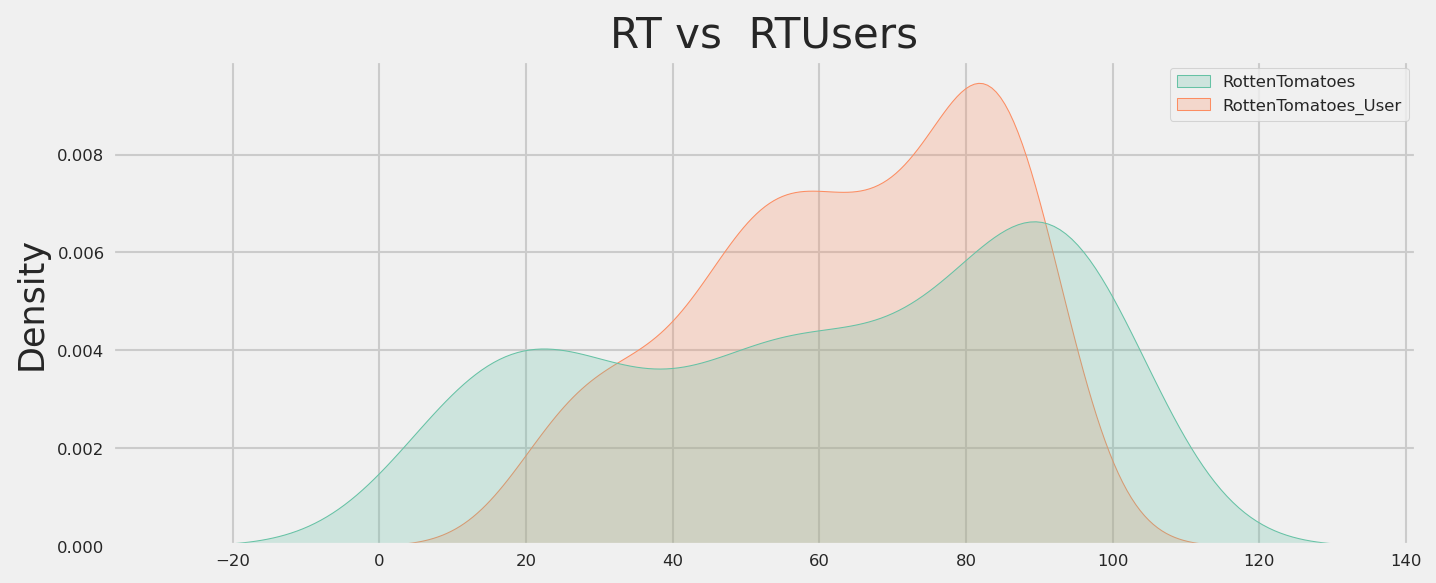

In [20]:
sns.set_palette('Set2')
sub_set_rt = others[['RottenTomatoes', 'RottenTomatoes_User']]
sns.kdeplot(sub_set_rt, fill=True);
plt.title("RT vs  RTUsers");

In [21]:
others['rotten_dif'] = others["RottenTomatoes"] - others['RottenTomatoes_User']
print(f"Mean Absolute Difference between User and Plataform (ROTTEN): {others['rotten_dif'].apply(abs).mean():.2f}%")

Mean Absolute Difference between User and Plataform (ROTTEN): 15.10%


### Top 10 - RT

In [22]:
pd.DataFrame(others.nlargest(10, 'RottenTomatoes')['RottenTomatoes'])

### Top 10 - RT Users

,RottenTomatoes
FILM,
Seymour: An Introduction (2015),100
Gett: The Trial of Viviane Amsalem (2015),100
Shaun the Sheep Movie (2015),99
Leviathan (2014),99
Selma (2014),99
Timbuktu (2015),99
Song of the Sea (2014),99
Phoenix (2015),99
Mr. Turner (2014),98


In [23]:
pd.DataFrame(others.nlargest(10, 'RottenTomatoes_User')['RottenTomatoes_User'])

,RottenTomatoes_User
FILM,
Straight Outta Compton (2015),94
The Imitation Game (2014),92
Wild Tales (2014),92
Song of the Sea (2014),92
Amy (2015),91
Ant-Man (2015),90
The Salt of the Earth (2015),90
Mission: Impossible â€“ Rogue Nation (2015),90
Inside Out (2015),90


### METACRITIC

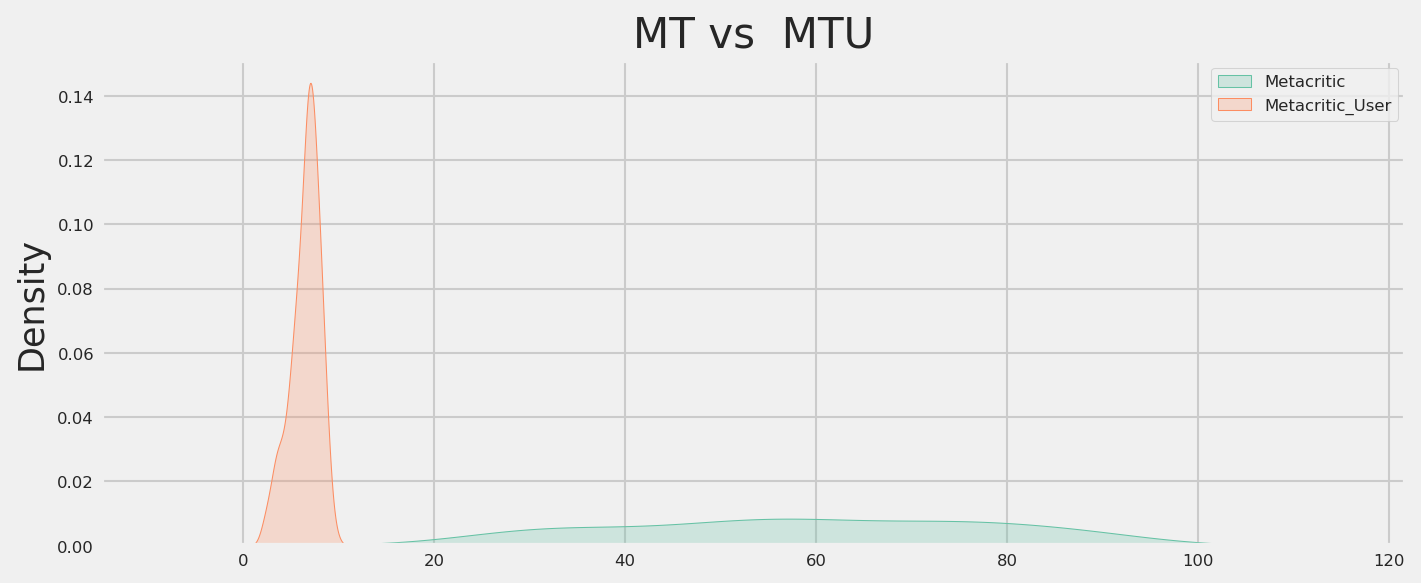

In [24]:
sns.set_palette('Set2')
sub_set_mt = others[['Metacritic', 'Metacritic_User']]
sns.kdeplot(sub_set_mt, fill=True);
plt.title("MT vs  MTU");

In [25]:
others['mt_dif'] = others["Metacritic"] - others['Metacritic_User']
print(f"Mean Absolute Difference between User and Plataform (METACRITIC): {others['mt_dif'].apply(abs).mean():.2f}%")

Mean Absolute Difference between User and Plataform (METACRITIC): 52.29%


### Top 10 - MT

In [26]:
pd.DataFrame(others.nlargest(10, 'Metacritic')['Metacritic'])

,Metacritic
FILM,
Mr. Turner (2014),94
Inside Out (2015),94
Leviathan (2014),92
Timbuktu (2015),91
Phoenix (2015),91
Gett: The Trial of Viviane Amsalem (2015),90
Selma (2014),89
Mad Max: Fury Road (2015),89
"Two Days, One Night (2014)",89


## Top 10 - MT Users

In [27]:
pd.DataFrame(others.nlargest(10, 'Metacritic_User')['Metacritic_User'])

,Metacritic_User
FILM,
About Elly (2015),9.6
Inside Out (2015),8.9
Shaun the Sheep Movie (2015),8.8
Wild Tales (2014),8.8
Amy (2015),8.8
"Two Days, One Night (2014)",8.8
Mad Max: Fury Road (2015),8.7
The Overnight (2015),8.6
Love & Mercy (2015),8.5


### Top 10 - Most Voted MT

In [28]:
pd.DataFrame(others.nlargest(10, 'Metacritic_user_vote_count')['Metacritic_user_vote_count'])

,Metacritic_user_vote_count
FILM,
Mad Max: Fury Road (2015),2375
Avengers: Age of Ultron (2015),1330
Jurassic World (2015),1281
Birdman (2014),1171
Kingsman: The Secret Service (2015),1054
The Hobbit: The Battle of the Five Armies (2014),903
American Sniper (2015),850
Inside Out (2015),807
Terminator Genisys (2015),779


### IMDB

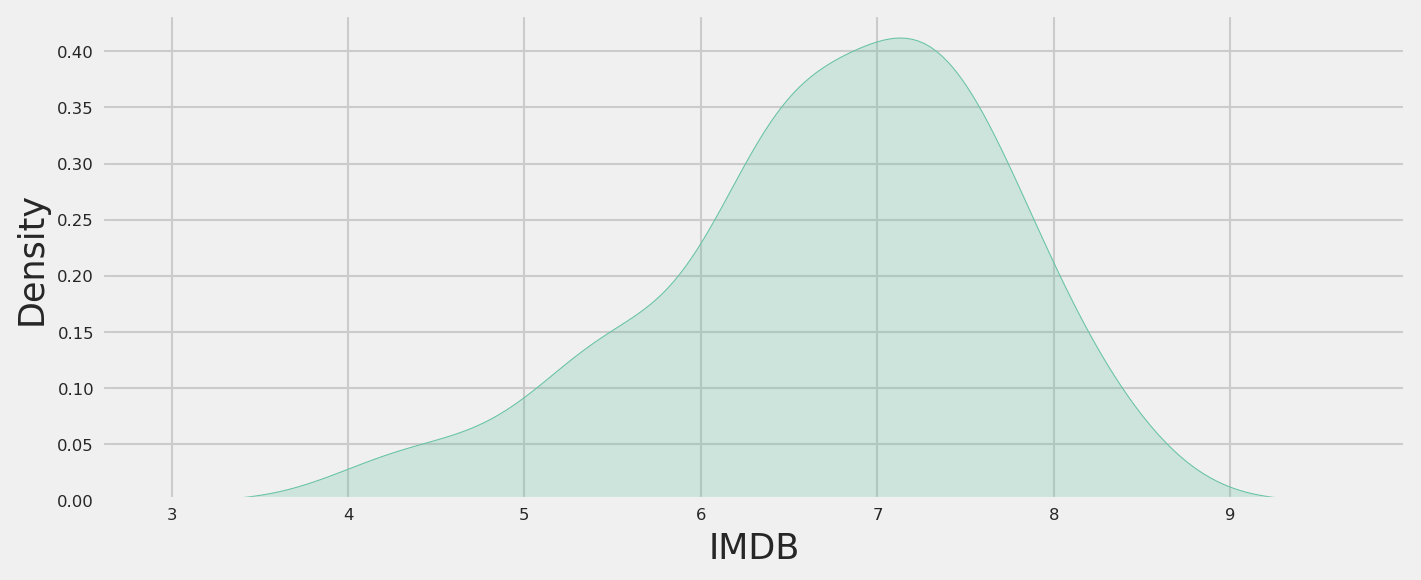

In [29]:
sns.kdeplot(data=others, x='IMDB', fill=True);

### Top 10 - Most Voted on IMDB

In [30]:
pd.DataFrame(others.nlargest(10, 'IMDB_user_vote_count')['IMDB_user_vote_count'])

,IMDB_user_vote_count
FILM,
The Imitation Game (2014),334164
Birdman (2014),303505
Mad Max: Fury Road (2015),292023
The Hobbit: The Battle of the Five Armies (2014),289464
Kingsman: The Secret Service (2015),272204
Avengers: Age of Ultron (2015),271107
American Sniper (2015),251856
Jurassic World (2015),241807
Furious 7 (2015),207211


# Part III
In this stage, we will finally aim to evaluate the values used by the Fandango platform and compare them with other sites to determine if there is indeed a contrast with the values displayed on the website.

### Merged Data

In [31]:
merged_df = pd.merge(others, sub_4, on="FILM", how="inner")
merged_df.sample(10)

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rotten_dif,mt_dif,STARS,RATING,VOTES,DIFFERENCE,PERCENTAGE
FILM,,,,,,,,,,,,,,
Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,59.5,5.0,4.5,12640,0.5,11.11
Song of the Sea (2014),99,92,86,8.2,8.2,62,14067,7,77.8,4.5,4.3,66,0.2,4.65
Annie (2014),27,61,33,4.8,5.2,108,19222,-34,28.2,4.5,4.2,6835,0.3,7.14
What We Do in the Shadows (2015),96,86,75,8.3,7.6,69,39561,10,66.7,4.5,4.3,259,0.2,4.65
The Hunting Ground (2015),92,72,77,7.8,7.5,6,1196,20,69.2,4.5,4.1,42,0.4,9.76
Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,55.9,5.0,4.5,12055,0.5,11.11
Unbroken (2014),51,70,59,6.5,7.2,218,77518,-19,52.5,4.5,4.1,9443,0.4,9.76
The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,31.7,4.5,4.4,6506,0.1,2.27
The Age of Adaline (2015),54,68,51,7.4,7.3,100,45510,-14,43.6,4.5,4.2,3325,0.3,7.14


### Transform Data
To make the comparison between ratings 'fair,' we need to normalize the data from the columns that use a scale of 0 to 100 to evaluate movies (RT, MT, and IMDB).

In [32]:
merged_df['RT_norm'] = np.round(merged_df['RottenTomatoes']/20, 1)
merged_df['RTU_norm'] = np.round(merged_df['RottenTomatoes_User']/20, 1)
merged_df['MT_norm'] = np.round(merged_df['Metacritic']/20, 1)
merged_df['MTU_norm'] = np.round(merged_df['Metacritic']/2, 1)
merged_df['IMDB_norm'] = np.round(merged_df['IMDB']/2, 1)

In [33]:
merged_df.sample(3)

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,rotten_dif,mt_dif,STARS,RATING,VOTES,DIFFERENCE,PERCENTAGE,RT_norm,RTU_norm,MT_norm,MTU_norm,IMDB_norm
FILM,,,,,,,,,,,,,,,,,,,
Entourage (2015),32,68,38,5.2,7.1,96,21914,-36,32.8,4.5,4.2,4279,0.3,7.14,1.6,3.4,1.9,19.0,3.6
The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,64.8,5.0,4.6,8055,0.4,8.70,4.5,4.6,3.6,36.5,4.0
The Hobbit: The Battle of the Five Armies (2014),61,75,59,7.0,7.5,903,289464,-14,52.0,4.5,4.3,15337,0.2,4.65,3.0,3.8,3.0,29.5,3.8


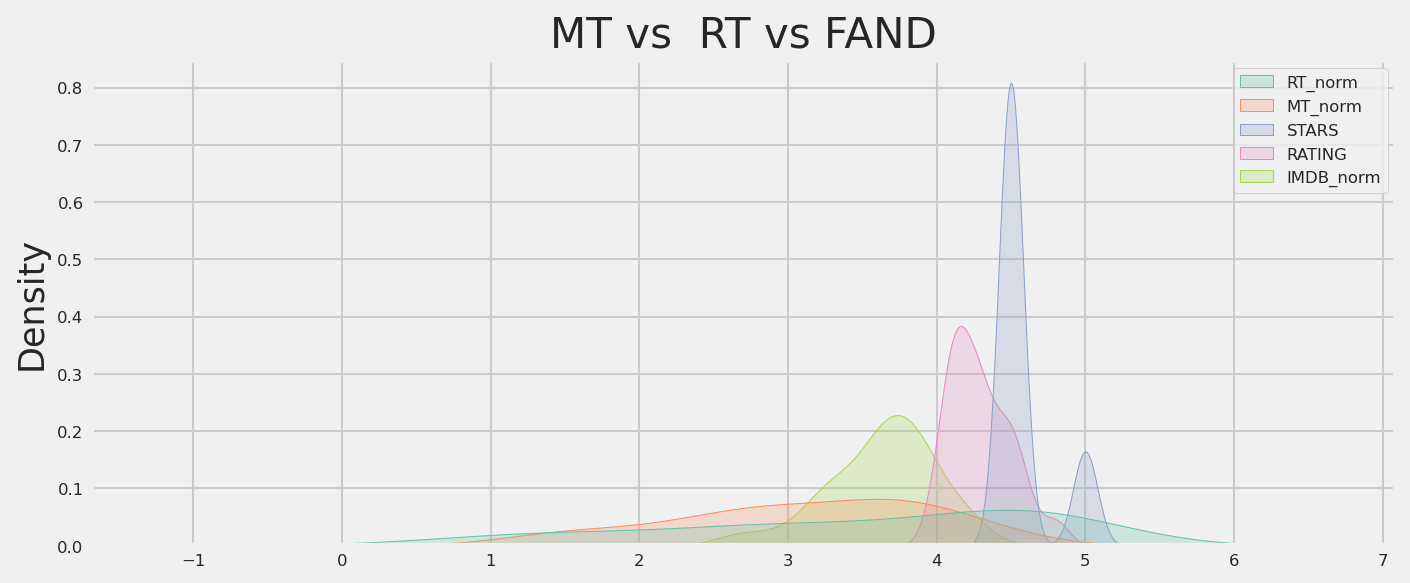

In [34]:
sns.set_palette('Set2')
sub_set_mg = merged_df[['RT_norm', 'MT_norm', 'STARS', 'RATING', 'IMDB_norm']]
sns.kdeplot(sub_set_mg, fill=True);
plt.title("MT vs  RT vs FAND");

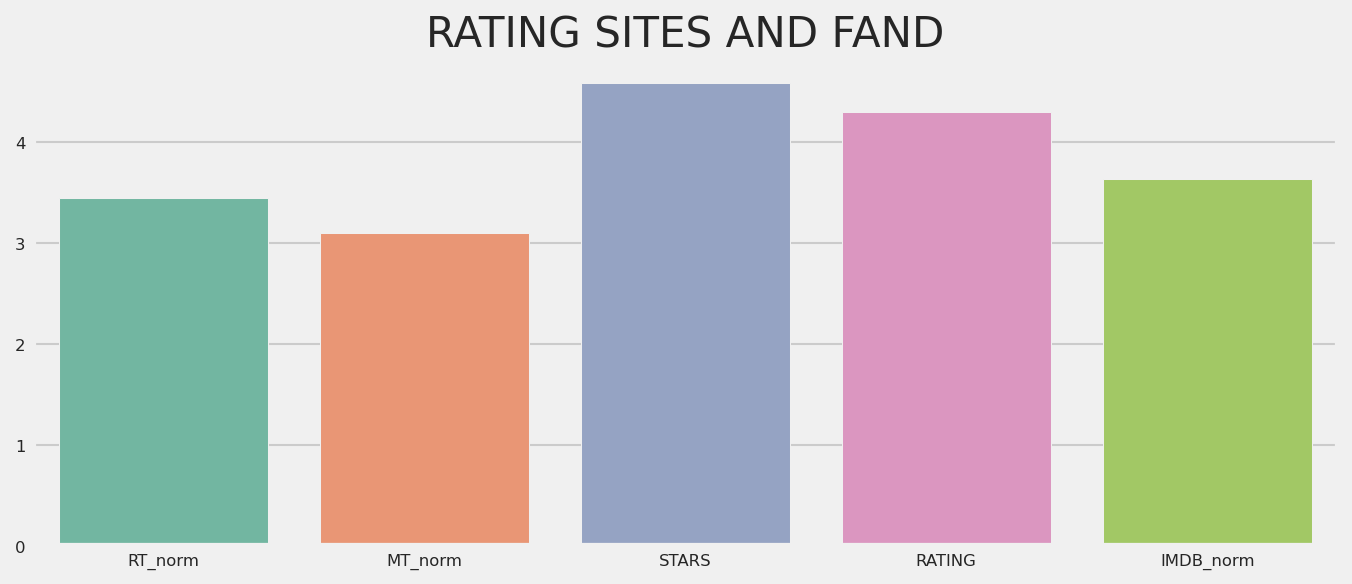

In [35]:
sns.set_palette('Set2')
sub_set_mg = merged_df[['RT_norm', 'MT_norm', 'STARS', 'RATING', 'IMDB_norm']]
sns.barplot(sub_set_mg, fill=True, errorbar=("ci", False));
plt.title("RATING SITES AND FAND");

Notice how for the values we discussed earlier (4 to 5), there is a higher frequency, particularly for the same movies. This could happen, as mentioned before, due to the 'rounding' process.

In [36]:
pd.DataFrame(merged_df.groupby(['RATING', 'PERCENTAGE'])['VOTES'].mean()).sort_values('VOTES', ascending=True)

VOTES
RATING PERCENTAGE              
4.0    12.50         740.250000
4.1    9.76         3349.437500
4.2    7.14         4377.583333
4.4    2.27         4472.833333
4.3    4.65         4826.909091
4.6    8.70         6010.250000
4.5    11.11       10333.500000
       0.00        11320.800000
4.8    4.17        25239.666667

One hypothesis would be to assume that movies that received lower ratings may have been inflated to potentially boost sales.

# Conclusion
We conclude by saying that it is at least curious that for movies with ratings between 4.0 and 5.0 stars, there are increases at certain moments of **25%**, without, considering the limitation of the data presented here, being possible to justify the increases that do not follow mathematical rounding, as it is known that the FANDANGO platform also sells tickets and there may have been a conflict of interest in selecting the ratings.

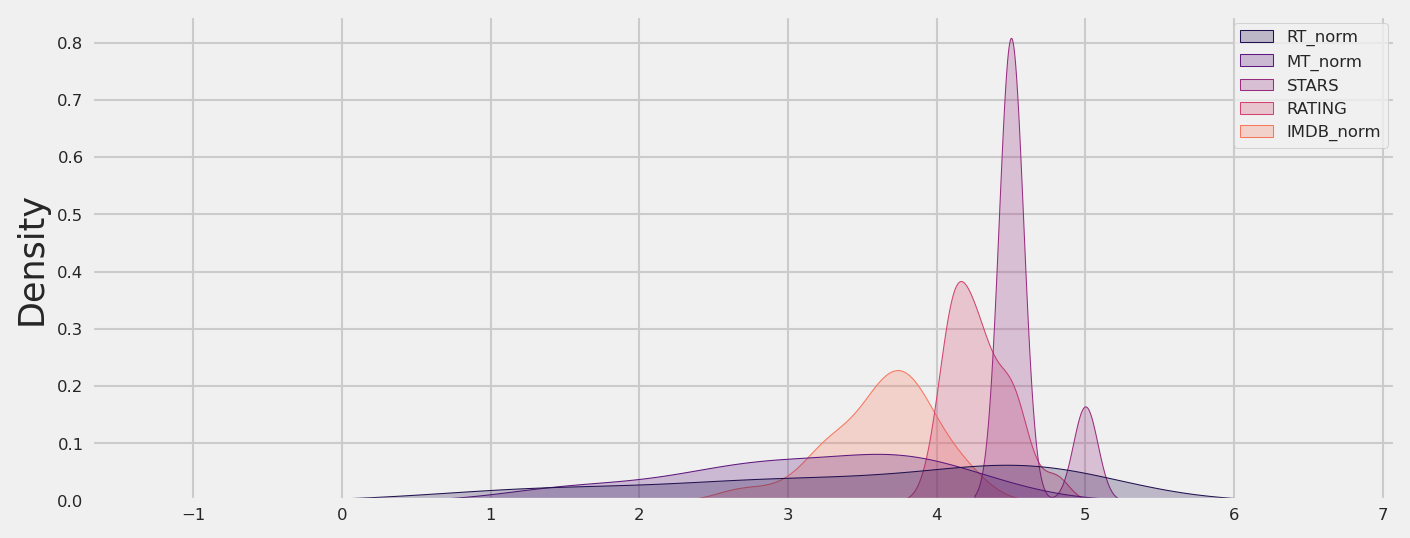

In [37]:
sns.set_palette('magma')
sub_set_mg = merged_df[['RT_norm', 'MT_norm', 'STARS', 'RATING', 'IMDB_norm']]
sns.kdeplot(sub_set_mg, fill=True);